 Project Title: WS Graphs – Replicating Watts and Strogatz

 Author: Parsa Mojgan

 Date: February 22, 2024

 Purpose: This notebook conducts a computational experiment on Watts-Strogatz graphs. It generates graphs with varying rewiring probabilities, calculates mean path length and clustering coefficient,
 and visualizes the results using Matplotlib. The goal is to observe the impact of rewiring on network properties.

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# you could change n,k,and p to customize the experiment.
def generate_ws_graph(n, k, p):
    """
    Generates a Watts-Strogatz graph.

    Parameters:
    - n: int, number of nodes
    - k: int, each node is connected to k neighbors on each side in the ring
    - p: float, rewiring probability

    Returns:
    - graph: NetworkX Graph
    """
    return nx.watts_strogatz_graph(n, k, p)

def calculate_metrics(graph):
    """
    Calculates mean path length and clustering coefficient of a graph.

    Parameters:
    - graph: NetworkX Graph

    Returns:
    - mean_path_length: float
    - clustering_coefficient: float
    """
    mean_path_length = nx.average_shortest_path_length(graph)
    clustering_coefficient = nx.average_clustering(graph)
    return mean_path_length, clustering_coefficient


The following code parameterizes the experiment,performes the experiment and plots the result using Matplotlib.

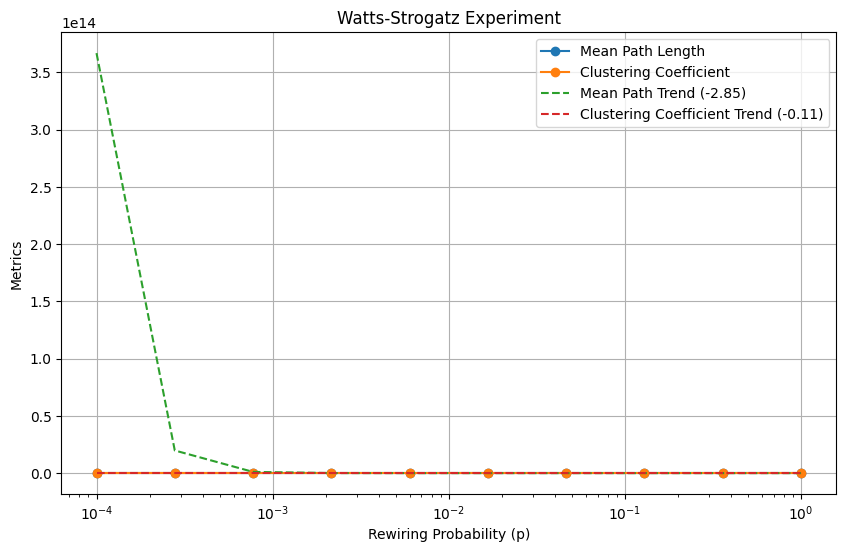

In [ ]:
# Parameterizing the experiment
graph_size = 100
k = 4
num_trials = 10
p_values = np.logspace(-4, 0, 10)
mean_path_lengths = []
clustering_coefficients = []

# Performing the experiment
for p in p_values:
    total_mean_path_length = 0
    total_clustering_coefficient = 0

    for _ in range(num_trials):
        graph = generate_ws_graph(graph_size, k, p)
        mean_path_length, clustering_coefficient = calculate_metrics(graph)
        total_mean_path_length += mean_path_length
        total_clustering_coefficient += clustering_coefficient


    mean_path_lengths.append(total_mean_path_length / num_trials)
    clustering_coefficients.append(total_clustering_coefficient / num_trials)

# Plotting the results using Matplotlib
plt.figure(figsize=(10, 6))

plt.plot(p_values, mean_path_lengths, label='Mean Path Length', marker='o')

plt.plot(p_values, clustering_coefficients, label='Clustering Coefficient', marker='o')

plt.xscale('log')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Metrics')
plt.title('Watts-Strogatz Experiment')
plt.legend()
plt.grid(True)

mean_path_trend = np.polyfit(np.log10(p_values), mean_path_lengths, 1)
clustering_coefficient_trend = np.polyfit(np.log10(p_values), clustering_coefficients, 1)

plt.plot(p_values, np.power(10, np.polyval(mean_path_trend, np.log10(p_values))),
         label=f'Mean Path Trend ({mean_path_trend[0]:.2f})', linestyle='--')

plt.plot(p_values, np.power(10, np.polyval(clustering_coefficient_trend, np.log10(p_values))),
         label=f'Clustering Coefficient Trend ({clustering_coefficient_trend[0]:.2f})', linestyle='--')


plt.legend()
plt.show()

Results :
we can observe that as p increases the meath path trend drops quickly, indicating increased global connectivity.